In [21]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

#load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [22]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [23]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


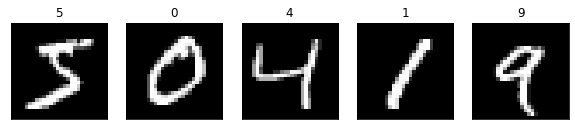

In [24]:
# show some pictures in MNIST
fig, axes = plt.subplots(ncols=5, sharex=False,
                        sharey=True, figsize=(10,4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [25]:
print(y_train)

[5 0 4 ... 5 6 8]


In [26]:
#convert y_train to one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train_one_hot = np.array(temp)

#convert y_test to one-hot format
temp = []
for i in range(len(y_test)):
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test_one_hot = np.array(temp)

In [27]:
#create neural network model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(10, activation='softmax')) 

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 30)                23550     
                                                                 
 dense_3 (Dense)             (None, 10)                310       
                                                                 
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [30]:
model.fit(X_train, y_train_one_hot, epochs=10, validation_data=(X_test, y_test_one_hot))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7953 - acc: 0.7825 - val_loss: 0.5464 - val_acc: 0.8451
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4725 - acc: 0.8642 - val_loss: 0.4466 - val_acc: 0.8642
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4329 - acc: 0.8700 - val_loss: 0.3984 - val_acc: 0.8794
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3983 - acc: 0.8781 - val_loss: 0.4067 - val_acc: 0.8760
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3856 - acc: 0.8831 - val_loss: 0.3404 - val_acc: 0.8987
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3691 - acc: 0.8895 - val_loss: 0.3409 - val_acc: 0.9010
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3626 - acc: 0.8909 - val_loss: 0.3261 - val_acc: 0.9040
Epoch 8/10
1875/1875 [==============================] - 2s 1ms

In [31]:
predictions = model.predict(X_test)
print(predictions[0])

313/313 [==============================] - 0s 619us/step
[2.7340113e-07 1.1730902e-05 1.1596002e-05 4.2194751e-04 5.5781461e-06
 1.6544042e-05 4.8007460e-09 9.9932575e-01 2.2482565e-05 1.8424549e-04]


In [32]:
predictions = np.argmax(predictions, axis=1)
print(predictions[0])

7


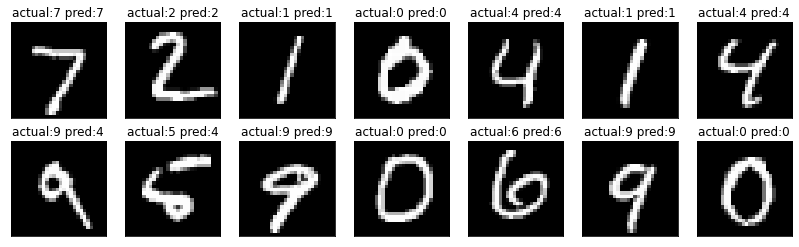

In [36]:
fig, axes = plt.subplots(nrows=2, ncols=7, sharex=False, 
                         sharey=True, figsize=(14, 4))
index = 0
for i in range(2):
    for j in range(7):
        axes[i,j].set_title('actual:{} pred:{}'.format(y_test[index], predictions[index]))
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()